1. Batch Normalization을 적용한 것과 적용하지 않은 ANN 모델을 비교합니다.

1-1. Batch Norm 적용하지 않은 ANN 모델

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

predictions[0]
np.argmax(predictions[0])
test_labels[0]

def plot_image(i, predictions_array, true_label, img):
	true_label, img = true_label[i], img[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])

	plt.imshow(img, cmap=plt.cm.binary)

	predicted_label = np.argmax(predictions_array)
	if predicted_label == true_label:
		color = 'blue'
	else:
		color = 'red'

	plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
								100*np.max(predictions_array),
								class_names[true_label]),
								color=color)

def plot_value_array(i, predictions_array, true_label):
	true_label = true_label[i]
	plt.grid(False)
	plt.xticks(range(10))
	plt.yticks([])
	thisplot = plt.bar(range(10), predictions_array, color="#777777")
	plt.ylim([0, 1])
	predicted_label = np.argmax(predictions_array)

	thisplot[predicted_label].set_color('red')
	thisplot[true_label].set_color('blue')
  
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
	plt.subplot(num_rows, 2*num_cols, 2*i+1)
	plot_image(i, predictions[i], test_labels, test_images)
	plt.subplot(num_rows, 2*num_cols, 2*i+2)
	plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

1-2. Batch Norm 적용한 ANN 모델

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

predictions[0]
np.argmax(predictions[0])
test_labels[0]

def plot_image(i, predictions_array, true_label, img):
	true_label, img = true_label[i], img[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])

	plt.imshow(img, cmap=plt.cm.binary)

	predicted_label = np.argmax(predictions_array)
	if predicted_label == true_label:
		color = 'blue'
	else:
		color = 'red'

	plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
								100*np.max(predictions_array),
								class_names[true_label]),
								color=color)

def plot_value_array(i, predictions_array, true_label):
	true_label = true_label[i]
	plt.grid(False)
	plt.xticks(range(10))
	plt.yticks([])
	thisplot = plt.bar(range(10), predictions_array, color="#777777")
	plt.ylim([0, 1])
	predicted_label = np.argmax(predictions_array)

	thisplot[predicted_label].set_color('red')
	thisplot[true_label].set_color('blue')
  
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
	plt.subplot(num_rows, 2*num_cols, 2*i+1)
	plot_image(i, predictions[i], test_labels, test_images)
	plt.subplot(num_rows, 2*num_cols, 2*i+2)
	plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

2-1. 임의의 볼록 함수를 정의하고 그것의 최소값을 구하는 계산을 SGD를 적용하여 해결합니다. 이때 SGD를 적용하여야 함을 주의하시기 바랍니다.

2-2. 정의한 볼록 함수 최솟값 문제를 다시 Newton method를 적용하여 해결합니다.

2-1. 임의의 볼록 함수를 정의하고 그것의 최소값을 구하는 계산을 SGD를 적용하여 해결합니다. 이때 SGD를 적용하여야 함을 주의하시기 바랍니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Sgd:
    """ SGD: Stochastic Gradient Descent
    W = W - lr * dL/dW
    """
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        
    def update(self, params, gradients):
        for key in params:
            # W = W - lr * dl/dW
            params[key] -= self.learning_rate * gradients[key]
class Newton:
    """ Newton : Newton Method
    f(n) = f(n-1) - f(n-1)/f'(n-1)
    """
    def update(self, params, gradients):
        for key in params:
            # W = W - lr * dl/dW
            params[key] -= params[key] * gradients[key]
            
def fn(x):
    return x**2

def fn_derivative(x): # 함수 fn의 미분값
    return 2*x

# Sgd 클래스의 객체(인스턴스)를 생성
sgd = Sgd(0.95)

# ex01 모듈에서 작성한 fn(x, y) 함수의 최솟값을 임의의 점에서 시작해서 찾아감.
init_position = (-7.0)

# 신경망에서 찾고자 하는 파라미터의 초깃값
params = dict()
params['x'] = init_position

# 각 파라미터에 대한 변화율(gradient)
gradients = dict()
gradients['x'] = 0

# 각 파라미터들(x, y)을 갱신할 때마다 갱신된 값을 저장할 리스트
x_history = []
y_history = []
for i in range(30):
    x_history.append(params['x'])
    y_history.append(fn(params['x']))
    gradients['x'] = fn_derivative(params['x'])  # gradients 갱신
    sgd.update(params, gradients)

for x in zip(x_history):
    print(f'({x})')
    
print(y_history)
    
x = np.linspace(-10, 10, 200)
y = fn(x)
plt.xlabel('x')
plt.ylabel('y')
plt.axis([(init_position-3), -(init_position-3), -10, fn(init_position)*1.2])
plt.plot(x_history, y_history, 'o-', color='red')
plt.plot(x, y, color='blue')
plt.text(x_history[0], y_history[0], 'start', fontsize=20, va='bottom', ha='left')
plt.text(x_history[29], y_history[29], 'last', fontsize=20, va='top', ha='left')
plt.plot(x_history[29], y_history[29], 'o', color='black')
plt.plot()
plt.show()

2-2. 정의한 볼록 함수 최솟값 문제를 다시 Newton method를 적용하여 해결합니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class Sgd:
    """ SGD: Stochastic Gradient Descent
    W = W - lr * dL/dW
    """
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        
    def update(self, params, gradients):
        for key in params:
            # W = W - lr * dl/dW
            params[key] -= self.learning_rate * gradients[key]
class Newton:
    """ Newton : Newton Method
    f(n) = f(n-1) - f(n-1)/f'(n-1)
    """
    def update(self, params, gradients):
        for key in params:
            # W = W - lr * dl/dW
            params[key] -= params[key] * gradients[key]
            

def fn(x):
    return x**2

def fn_derivative(x): # 함수 fn의 미분값
    return 2*x

# newton method 클래스의 객체(인스턴스)를 생성
newton = Newton()

# ex01 모듈에서 작성한 fn(x) 함수의 최솟값을 임의의 점에서 시작해서 찾아감.
init_position = (-7.0)

# 신경망에서 찾고자 하는 파라미터의 초깃값
params = dict()
params['x'] = init_position

# 각 파라미터에 대한 변화율(gradient)
gradients = dict()

# 각 파라미터에 대한 함수 출력값(fx)
fx = dict()

# 각 파라미터들(x, y)을 갱신할 때마다 갱신된 값을 저장할 리스트
x_history = []
y_history = []
len = 30
for i in range(len):
    x_history.append(params['x'])
    y_history.append(fn(params['x']))
    gradients['x'] = fn_derivative(params['x'])  # gradients 갱신
    fx['x'] = fn(params['x'])  # gradients 갱신
    newton.update(params, fx, gradients)

for x in zip(x_history):
    print(f'({x})')
    
print(y_history)
    
x = np.linspace((init_position-3), -(init_position-3), 200)
y = fn(x)
plt.xlabel('x')
plt.ylabel('y')
plt.axis([(init_position-3), -(init_position-3), -10, fn(init_position)*1.2])
plt.plot(x_history, y_history, 'o-', color='red')
plt.plot(x, y, color='blue')
plt.text(x_history[0], y_history[0], 'start', fontsize=20, va='bottom', ha='left')
plt.text(x_history[len-1], y_history[len-1], 'last', fontsize=20, va='top', ha='left')
plt.plot(x_history[len-1], y_history[len-1], 'o', color='black')
plt.plot()
plt.show()

3. ReLu와 leaky ReLu 활성함수를 적용한 예제를 통하여 두가지 활성함수를 비교 분석합니다.

3-1 ReLu

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

predictions[0]
np.argmax(predictions[0])
test_labels[0]

def plot_image(i, predictions_array, true_label, img):
	true_label, img = true_label[i], img[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])

	plt.imshow(img, cmap=plt.cm.binary)

	predicted_label = np.argmax(predictions_array)
	if predicted_label == true_label:
		color = 'blue'
	else:
		color = 'red'

	plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
								100*np.max(predictions_array),
								class_names[true_label]),
								color=color)

def plot_value_array(i, predictions_array, true_label):
	true_label = true_label[i]
	plt.grid(False)
	plt.xticks(range(10))
	plt.yticks([])
	thisplot = plt.bar(range(10), predictions_array, color="#777777")
	plt.ylim([0, 1])
	predicted_label = np.argmax(predictions_array)

	thisplot[predicted_label].set_color('red')
	thisplot[true_label].set_color('blue')
  
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
	plt.subplot(num_rows, 2*num_cols, 2*i+1)
	plot_image(i, predictions[i], test_labels, test_images)
	plt.subplot(num_rows, 2*num_cols, 2*i+2)
	plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

3-1 leaky ReLu

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU()),
    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU()),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

predictions[0]
np.argmax(predictions[0])
test_labels[0]

def plot_image(i, predictions_array, true_label, img):
	true_label, img = true_label[i], img[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])

	plt.imshow(img, cmap=plt.cm.binary)

	predicted_label = np.argmax(predictions_array)
	if predicted_label == true_label:
		color = 'blue'
	else:
		color = 'red'

	plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
								100*np.max(predictions_array),
								class_names[true_label]),
								color=color)

def plot_value_array(i, predictions_array, true_label):
	true_label = true_label[i]
	plt.grid(False)
	plt.xticks(range(10))
	plt.yticks([])
	thisplot = plt.bar(range(10), predictions_array, color="#777777")
	plt.ylim([0, 1])
	predicted_label = np.argmax(predictions_array)

	thisplot[predicted_label].set_color('red')
	thisplot[true_label].set_color('blue')
  
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
	plt.subplot(num_rows, 2*num_cols, 2*i+1)
	plot_image(i, predictions[i], test_labels, test_images)
	plt.subplot(num_rows, 2*num_cols, 2*i+2)
	plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

4. 최적화 문제를 정의하고, 경사하강법을 적용하여 해결합니다. (ANN, 회귀문제 제외)

((0.0,))
((0.420000000000000,))
((0.664551844050564,))
((0.753984371720440,))
((0.789829474491145,))
((0.804999580195433,))
((0.811566962157983,))
((0.814437640819843,))
((0.815697702091583,))
((0.816251807113471,))
[196.000000000000, 47.4330324147589, 6.69760936200778, 1.11597303102395, 0.203095910823092, 0.0383278861245468, 0.00734535704325731, 0.00141710925529168, 0.000274193733613678, 5.31210088588260e-5]


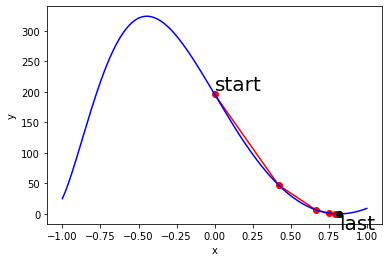

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sympy import Derivative, symbols
 

class Sgd:
    """ SGD: Stochastic Gradient Descent
    W = W - lr * dL/dW
    """
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        
    def update(self, params, gradients):
        for key in params:
            # W = W - lr * dl/dW
            params[key] -= self.learning_rate * gradients[key]
class Newton:
    """ Newton : Newton Method
    f(n) = f(n-1) - f(n-1)/f'(n-1)
    """
    def update(self, params, gradients):
        for key in params:
            # W = W - lr * dl/dW
            params[key] -= params[key] * gradients[key]
            

x_sym = symbols('x_sym')

f1x = (x_sym-3)**3+(x_sym+2)**2+x_sym
f1xdx = Derivative(f1x, x_sym).doit()

f2x = (x_sym-1)**5+(x_sym-2)**3
f2xdx = Derivative(f2x, x_sym).doit()

def fn1(x):
    return (x-3)**2

def fn1_derivative(x): # 함수 fn의 미분값
    return 2*x-6

def fn2(x):
    return x**4+x**3+x**2+x+1

def fn2_derivative(x): # 함수 fn의 미분값
    return 4*x**3+3*x**2+2*x+1

def lossfn(x):
    return (f1x.subs({x_sym: x}) - f2x.subs({x_sym: x}))**2

def lossfn_derivative(x):
    return 2*(f1x.subs({x_sym: x}) - f2x.subs({x_sym: x}))*(f1xdx.subs({x_sym: x}) - f2xdx.subs({x_sym: x}))
    

# Sgd 클래스의 객체(인스턴스)를 생성
sgd = Sgd(0.001)

# ex01 모듈에서 작성한 fn(x, y) 함수의 최솟값을 임의의 점에서 시작해서 찾아감.
init_position = (0.0)

# 신경망에서 찾고자 하는 파라미터의 초깃값
params = dict()
params['x'] = init_position

# 각 파라미터에 대한 변화율(gradient)
gradients = dict()
gradients['x'] = 0

# 각 파라미터들(x, y)을 갱신할 때마다 갱신된 값을 저장할 리스트
x_history = []
y_history = []
len = 10

for i in range(len):
    x_history.append(params['x'])
    y_history.append(lossfn(params['x']))
    gradients['x'] = lossfn_derivative(params['x'])  # gradients 갱신
    sgd.update(params, gradients)

for x in zip(x_history):
    print(f'({x})')
    
print(y_history)
y = []

x = np.linspace((init_position-1), -(init_position-1), 200)
for i in x:
    y.append(lossfn(i))
    
plt.xlabel('x')
plt.ylabel('y')
# plt.axis([(init_position-6), -(init_position-6), -10, 20])
plt.plot(x_history, y_history, 'o-', color='red')
plt.plot(x, y, color='blue')
plt.text(x_history[0], y_history[0], 'start', fontsize=20, va='bottom', ha='left')
plt.text(x_history[len-1], y_history[len-1], 'last', fontsize=20, va='top', ha='left')
plt.plot(x_history[len-1], y_history[len-1], 'o', color='black')
plt.plot()
plt.show()